# Exploratory data analysis


### Importing the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
%matplotlib inline

Settings for getting figures in high resolution

In [2]:
# sns.set(rc={"figure.dpi": 300, 'savefig.dpi': 300})
# sns.set_context('notebook')
# sns.set_style("ticks")

In [3]:
df=pd.read_pickle('./dataset_/dataset_cleaned_popularity.pkl')
df.drop(columns=['index', 'level_0'], inplace=True)  # Comes from pickeling the file
df.reset_index(drop=True, inplace=True)

In [4]:
df.head()

,country,uri,popularity,title,artist,release_type,sub_genre,artist_followers,explicit,album,release_date,track_number,tracks_in_album,danceability,energy,key,loudness,mode,speechiness,acoustics,instrumentalness,liveness,valence,tempo,time_signature,genre,days_since_release,released_after_2017,explicit_false,explicit_true,popu_max,top10_dummy,top50_dummy,cluster,duration_min,release_year,release_month,release_day
0,Global,https://open.spotify.com/track/6FyRXC8tJUh863J...,31833.95,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,4,hip hop,740.0,1.0,1,0,10,1.0,1.0,global,4.31065,2018,11,5
1,USA,https://open.spotify.com/track/6FyRXC8tJUh863J...,8.00,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,4,hip hop,740.0,1.0,1,0,191,0.0,0.0,english speaking and nordic,4.31065,2018,11,5
2,Argentina,https://open.spotify.com/track/6FyRXC8tJUh863J...,76924.40,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,4,hip hop,740.0,1.0,1,0,1,1.0,1.0,spanish speaking,4.31065,2018,11,5
3,Belgium,https://open.spotify.com/track/6FyRXC8tJUh863J...,849.60,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,4,hip hop,740.0,1.0,1,0,126,0.0,0.0,english speaking and nordic,4.31065,2018,11,5
4,Switzerland,https://open.spotify.com/track/6FyRXC8tJUh863J...,20739.10,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,4,hip hop,740.0,1.0,1,0,21,0.0,1.0,english speaking and nordic,4.31065,2018,11,5


### Visualize Genres

pop                 60020
hip hop             35805
rap                 13562
latin                9675
indie                7339
rock                 6337
dance/electronic     5751
else                 4819
house                4713
k-pop                4526
r&b/soul             4510
metal                2364
boy band             1983
trap                 1682
funk                 1052
reggaeton            1001
country               700
opm                   360
bolero                212
reggae                136
jazz                  134
Name: genre, dtype: int64
Total amount of genres: 21


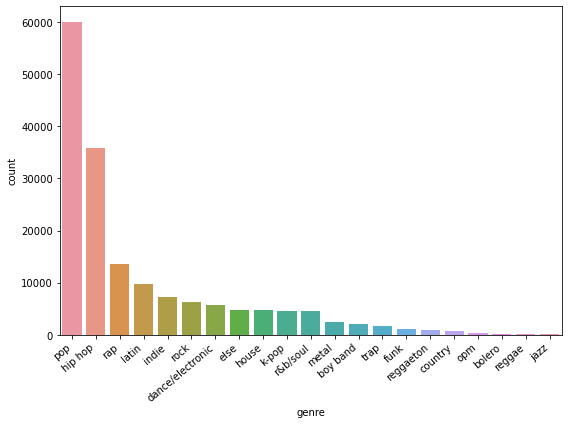

In [5]:
# How many basic genres in total 
print(df['genre'].value_counts())
print(f'Total amount of genres: {len(df["genre"].unique())}')
plt.figure(figsize=(8,6))
ax = sns.countplot(x='genre', data=df, order = df['genre'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.tight_layout()

We have a genre that is called *else*, where unknown gerne types are stored.

dance pop         25351
latin              7591
pop                7146
k-pop              4053
german hip hop     3834
                  ...  
azonto                1
french reggae         1
bubblegum pop         1
pop venezolano        1
chinese manyao        1
Name: sub_genre, Length: 1119, dtype: int64
Total amount of subgenres: 1119


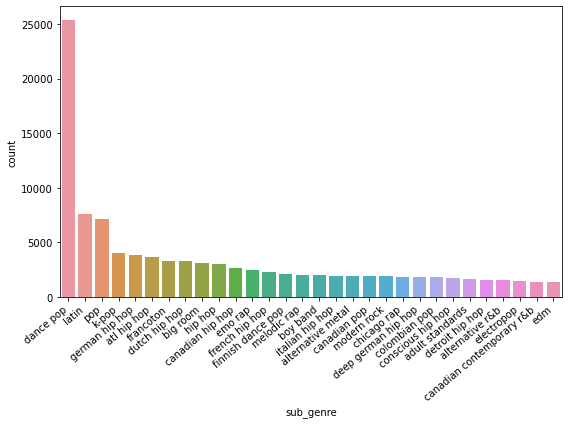

In [6]:
# How many subgenres in total are there
print(df['sub_genre'].value_counts())
print(f'Total amount of subgenres: {len(df["sub_genre"].unique())}')

# Only visualize the k most frequent subgernes 
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='sub_genre', data=df, order=df.sub_genre.value_counts().iloc[:30].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.tight_layout()

We can see that in the subgenre column we also have normal gernes like pop or hiphop, that are also in the genres column.

In [7]:
# I left this in here because I was curious
print('Dataset: ', df.shape[0], 'Rows with', df.shape[1], 'Features')

Dataset:  166681 Rows with 38 Features


###  Visualizing of numerical columns

In [8]:
palette = sns.color_palette("Set2")
sns.set_palette(palette)
sns.set_style('white')

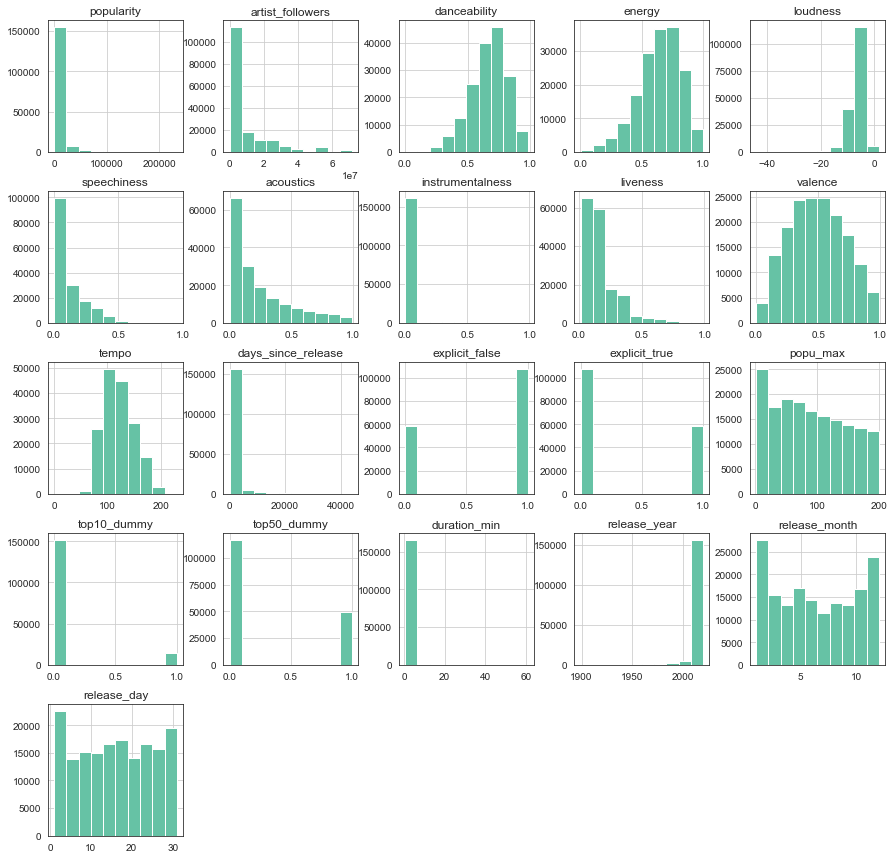

In [9]:
df.hist(figsize = (15,15))
plt.show()

**Heatmap**

In [10]:
df_numeric = df[['popularity', 'artist_followers', 'track_number', 'tracks_in_album', 'danceability', 'energy',
                 'loudness', 'speechiness', 'acoustics', 'instrumentalness', 'liveness', 'valence', 'tempo',
                 'days_since_release', 'popu_max','duration_min']]

In [11]:
df_numeric.describe()

,popularity,artist_followers,danceability,energy,loudness,speechiness,acoustics,instrumentalness,liveness,valence,tempo,days_since_release,popu_max,duration_min
count,166681.000000,1.666810e+05,166681.000000,166681.000000,166681.000000,166681.000000,166681.000000,166681.000000,166681.000000,166681.000000,166681.000000,166681.000000,166681.000000,166681.000000
mean,5511.366120,8.712254e+06,0.667507,0.642905,-6.526561,0.123948,0.241169,0.014143,0.176447,0.491854,120.967824,1478.998446,89.481567,3.451090
std,13236.831027,1.313740e+07,0.144698,0.172137,2.611996,0.116585,0.247521,0.086087,0.136795,0.222129,28.839627,2803.711234,58.016594,0.837369
min,0.800000,1.200000e+01,0.000000,0.002620,-43.988000,0.000000,0.000002,0.000000,0.011900,0.000000,0.000000,9.000000,1.000000,0.502217
25%,78.400000,4.410440e+05,0.578000,0.539000,-7.680000,0.042900,0.045500,0.000000,0.095300,0.322000,98.001000,435.000000,39.000000,2.989683
50%,530.400000,2.945049e+06,0.684000,0.662000,-6.113000,0.071800,0.151000,0.000000,0.123000,0.486000,119.934000,844.000000,84.000000,3.379100
75%,3995.050000,1.226375e+07,0.772000,0.770000,-4.821000,0.169000,0.367000,0.000039,0.210000,0.662000,140.007000,1252.000000,138.000000,3.808033
max,233766.900000,7.178310e+07,0.983000,1.000000,1.634000,0.955000,0.995000,0.987000,0.991000,0.989000,230.270000,44128.000000,200.000000,60.899283


In [12]:
# sns.pairplot(df_numeric.sample(n=1000), diag_kws={'color': 'darkgreen'})

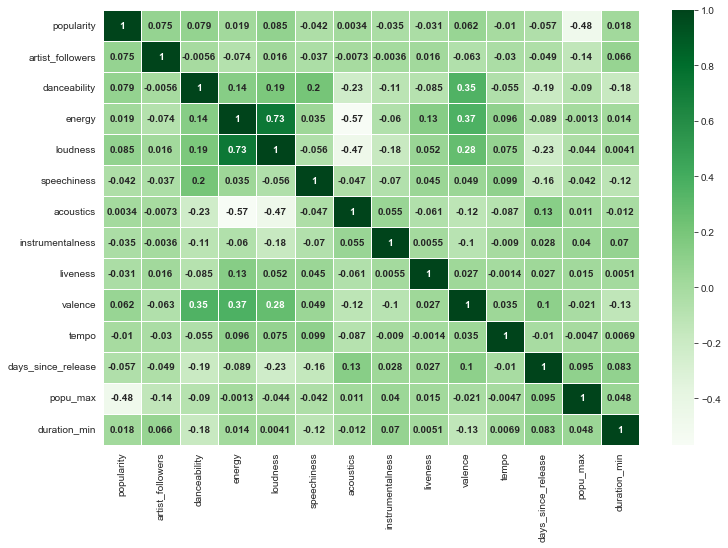

In [13]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot_kws={'weight': 'bold'}, linewidths=.5, cmap="Greens", annot=True)
plt.savefig("images/heatmap_new_dataset.png")

<Figure size 720x432 with 0 Axes>

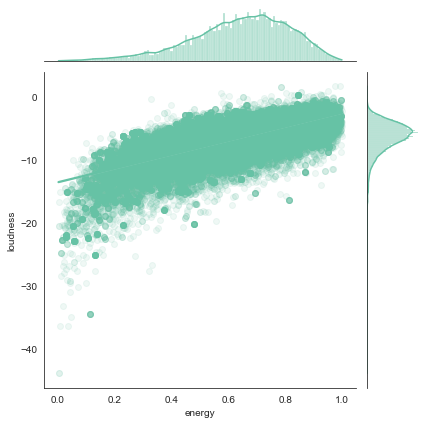

In [14]:
plt.figure(figsize=(10, 6))
ax = sns.jointplot(data=df_numeric, x="energy", y="loudness", kind='reg', joint_kws={'scatter_kws':dict(alpha=0.1)})

<Figure size 720x432 with 0 Axes>

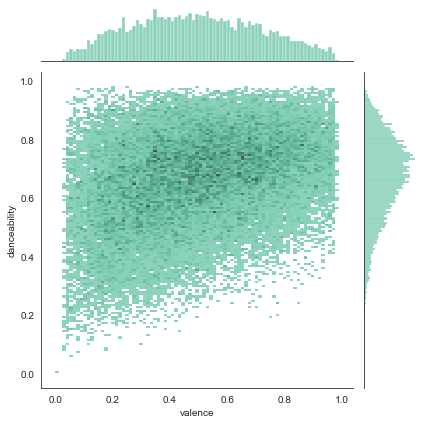

In [15]:
plt.figure(figsize=(10, 6))
ax = sns.jointplot(data=df_numeric, x="valence", y="danceability", kind='hist')

<Figure size 720x432 with 0 Axes>

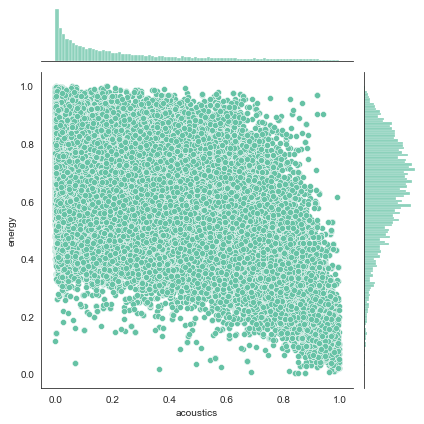

In [16]:
plt.figure(figsize=(10, 6))
ax = sns.jointplot(data=df_numeric, x="acoustics", y="energy")

<Figure size 720x432 with 0 Axes>

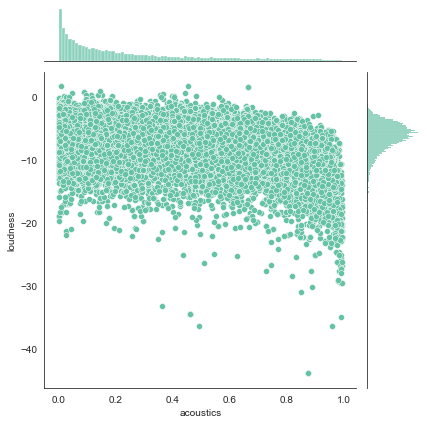

In [17]:
plt.figure(figsize=(10, 6))
ax = sns.jointplot(data=df_numeric, x="acoustics", y="loudness")

<Figure size 720x432 with 0 Axes>

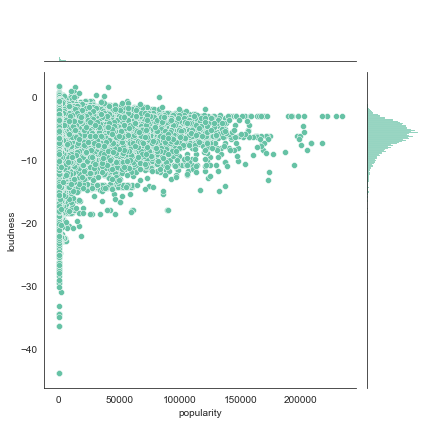

In [18]:
plt.figure(figsize=(10, 6))
ax = sns.jointplot(data=df_numeric, x="popularity", y="loudness")

**Just histplots again with other visuals**

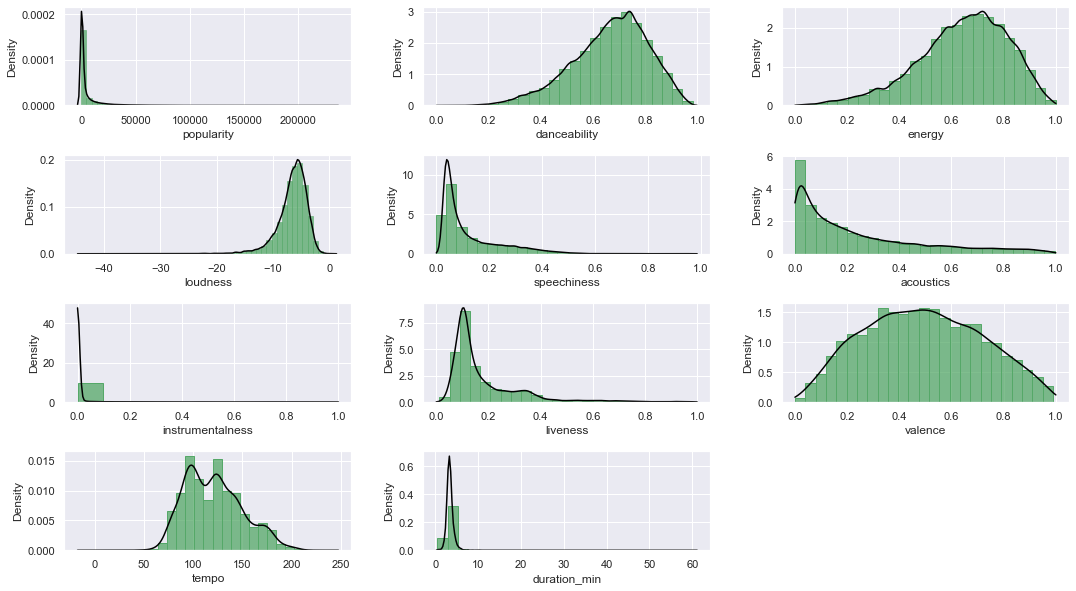

In [19]:
sns.set_theme()
fig, axes = plt.subplots(4, 3, figsize=(18, 10))
plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(wspace=0.25)

sns.histplot(ax=axes[0, 0], data=df, x='popularity',
             kde=False, bins=50, color='g', edgecolor='g', stat='density')
sns.kdeplot(data=df, x="popularity", color='black', ax=axes[0][0])

sns.histplot(ax=axes[0, 1], data=df, x='danceability', kde=False,
             bins=25, color='g', edgecolor='g', stat='density')
sns.kdeplot(data=df, x="danceability", color='black',
            ax=axes[0][1], clip=(0, 1))

# Some errors
sns.histplot(ax=axes[0, 2], data=df, x='energy', kde=False,
              bins=25, color='g', edgecolor='g', stat='density')
sns.kdeplot(data=df, x="energy", color='black', ax=axes[0][2], clip=(0, 1))

sns.histplot(ax=axes[1, 0], data=df, x='loudness', kde=False,
             bins=50, color='g', edgecolor='g', stat='density')
sns.kdeplot(data=df, x="loudness", color='black',
            ax=axes[1][0], clip=(-46.5, 1.3))

sns.histplot(ax=axes[1,1], data=df, x='speechiness', kde=False,
             bins=25, color='g', edgecolor='g', stat='density')
sns.kdeplot(data=df, x="speechiness", color='black',
            ax=axes[1][1], clip=(0, 1))

sns.histplot(ax=axes[1, 2], data=df, x='acoustics', kde=False,
              bins=25, color='g', edgecolor='g', stat='density')
sns.kdeplot(data=df, x="acoustics", color='black',
             ax=axes[1][2], clip=(0, 1))

sns.histplot(ax=axes[2, 0], data=df, x='instrumentalness',
             kde=False, bins=10, color='g', edgecolor='g', stat='density')
sns.kdeplot(data=df, x="instrumentalness",
            color='black', ax=axes[2][0], clip=(0, 1))

sns.histplot(ax=axes[2, 1], data=df, x='liveness', kde=False,
              bins=25, color='g', edgecolor='g', stat='density')
sns.kdeplot(data=df, x="liveness", color='black', ax=axes[2][1], clip=(0, 1))

sns.histplot(ax=axes[2, 2], data=df, x='valence',
             kde=False, bins=25, color='g', edgecolor='g', stat='density')
sns.kdeplot(data=df, x="valence", color='black',
            ax=axes[2][2], clip=(0, 1), bw_method=0.2)

sns.histplot(ax=axes[3, 0], data=df, x='tempo',
             kde=False, bins=25, color='g', edgecolor='g', stat='density')
sns.kdeplot(data=df, x="tempo",
            color='black', ax=axes[3][0], bw_method=0.2)

sns.histplot(ax=axes[3, 1], data=df, x='duration_min',
             kde=False, bins=25, color='g', edgecolor='g', stat='density')
sns.kdeplot(data=df, x="duration_min",
            color='black', ax=axes[3][1])

fig.delaxes(axes[3,2])

In [20]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,166681.0,5.511366e+03,1.323683e+04,0.800000,78.400000,5.304000e+02,3.995050e+03,2.337669e+05
artist_followers,166681.0,8.712254e+06,1.313740e+07,12.000000,441044.000000,2.945049e+06,1.226375e+07,7.178310e+07
danceability,166681.0,6.675074e-01,1.446984e-01,0.000000,0.578000,6.840000e-01,7.720000e-01,9.830000e-01
energy,166681.0,6.429052e-01,1.721367e-01,0.002620,0.539000,6.620000e-01,7.700000e-01,1.000000e+00
loudness,166681.0,-6.526561e+00,2.611996e+00,-43.988000,-7.680000,-6.113000e+00,-4.821000e+00,1.634000e+00
speechiness,166681.0,1.239484e-01,1.165846e-01,0.000000,0.042900,7.180000e-02,1.690000e-01,9.550000e-01
acoustics,166681.0,2.411694e-01,2.475209e-01,0.000002,0.045500,1.510000e-01,3.670000e-01,9.950000e-01
instrumentalness,166681.0,1.414345e-02,8.608676e-02,0.000000,0.000000,0.000000e+00,3.880000e-05,9.870000e-01
liveness,166681.0,1.764471e-01,1.367949e-01,0.011900,0.095300,1.230000e-01,2.100000e-01,9.910000e-01
valence,166681.0,4.918538e-01,2.221287e-01,0.000000,0.322000,4.860000e-01,6.620000e-01,9.890000e-01


**Boxplots and Violinplots**

*Why?* 
* Hopefully we will be less affected by outliers that make the data difficult to visualize with histplots.

*Affected features*
* popularity
* loudness
* instrumentalness
* duration

In [21]:
df[['popularity','loudness','instrumentalness','duration_min']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,166681.0,5511.366120,13236.831027,0.800000,78.400000,530.4000,3995.050000,233766.900000
loudness,166681.0,-6.526561,2.611996,-43.988000,-7.680000,-6.1130,-4.821000,1.634000
instrumentalness,166681.0,0.014143,0.086087,0.000000,0.000000,0.0000,0.000039,0.987000
duration_min,166681.0,3.451090,0.837369,0.502217,2.989683,3.3791,3.808033,60.899283


<AxesSubplot:xlabel='duration_min'>

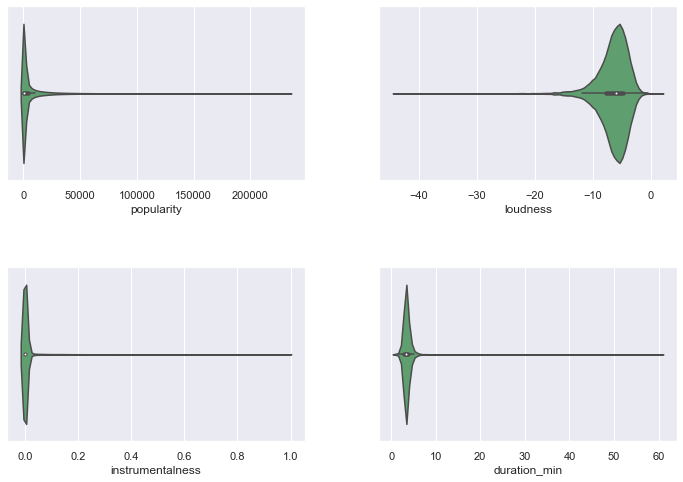

In [22]:
fig, axes = plt.subplots(2,2, figsize=(12, 8))
plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(wspace=0.25)

sns.violinplot(ax=axes[0, 0], data=df, x='popularity', color ='g')

sns.violinplot(ax=axes[0, 1], data=df, x='loudness', color='g')

sns.violinplot(ax=axes[1, 0], data=df, x='instrumentalness', color='g')

sns.violinplot(ax=axes[1,1], data=df, x='duration_min', color='g')

<AxesSubplot:xlabel='duration_min'>

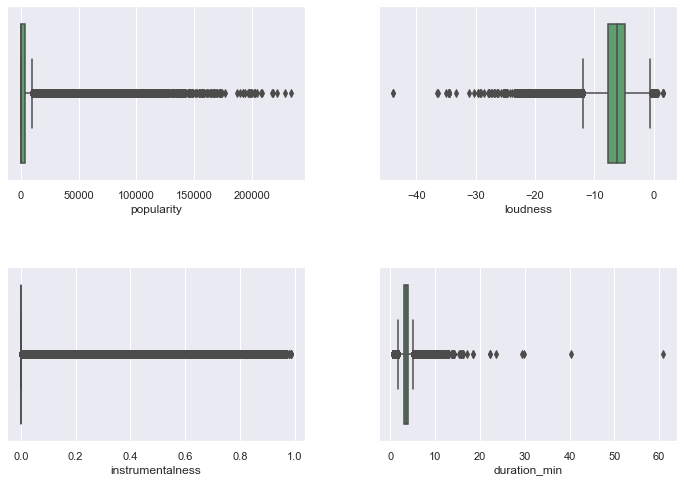

In [23]:
fig, axes = plt.subplots(2,2, figsize=(12, 8))
plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(wspace=0.25)

sns.boxplot(ax=axes[0, 0], data=df, x='popularity', color ='g')

sns.boxplot(ax=axes[0, 1], data=df, x='loudness', color='g')

sns.boxplot(ax=axes[1, 0], data=df, x='instrumentalness', color='g')

sns.boxplot(ax=axes[1,1], data=df, x='duration_min', color='g')

<AxesSubplot:xlabel='duration_min'>

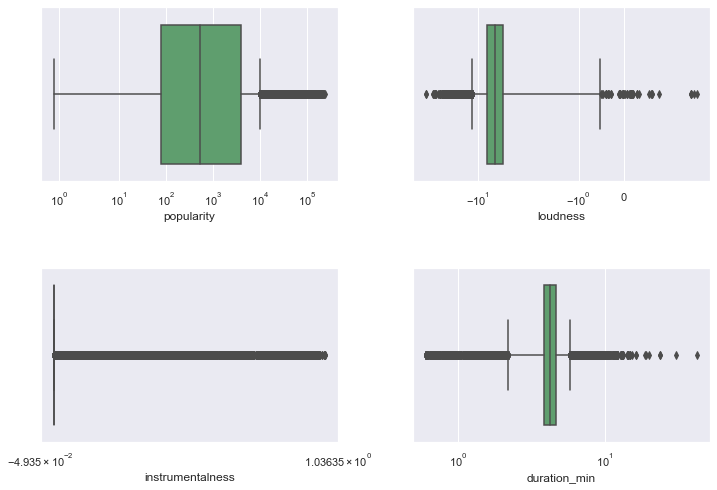

In [24]:
fig, axes = plt.subplots(2,2, figsize=(12, 8))
plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(wspace=0.25)

axes[0,0].set_xscale('symlog')
sns.boxplot(ax=axes[0, 0], data=df, x='popularity', color ='g')

axes[0,1].set_xscale('symlog')
sns.boxplot(ax=axes[0, 1], data=df, x='loudness', color='g')

axes[1,0].set_xscale('symlog')
sns.boxplot(ax=axes[1, 0], data=df, x='instrumentalness', color='g')

axes[1,1].set_xscale('symlog')
sns.boxplot(ax=axes[1,1], data=df, x='duration_min', color='g')

In [25]:
aux_df = df[['popularity','loudness','instrumentalness','duration_min']]
normalized_df = (aux_df-aux_df.min())/(aux_df.max()-aux_df.min())

<AxesSubplot:xlabel='duration_min'>

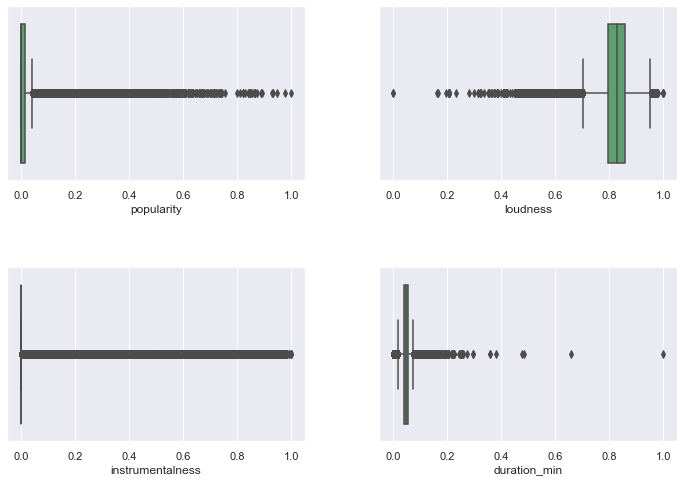

In [26]:
fig, axes = plt.subplots(2,2, figsize=(12, 8))
plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(wspace=0.25)

sns.boxplot(ax=axes[0, 0], data=normalized_df, x='popularity', color ='g')

sns.boxplot(ax=axes[0, 1], data=normalized_df, x='loudness', color='g')

sns.boxplot(ax=axes[1, 0], data=normalized_df, x='instrumentalness', color='g')

sns.boxplot(ax=axes[1,1], data=normalized_df, x='duration_min', color='g')

In [27]:
df['instrumentalness']

0         0.000000
1         0.000000
2         0.000000
3         0.000000
4         0.000000
            ...   
166676    0.000000
166677    0.000000
166678    0.000539
166679    0.000000
166680    0.000000
Name: instrumentalness, Length: 166681, dtype: float64

### Visualizing of categorical features

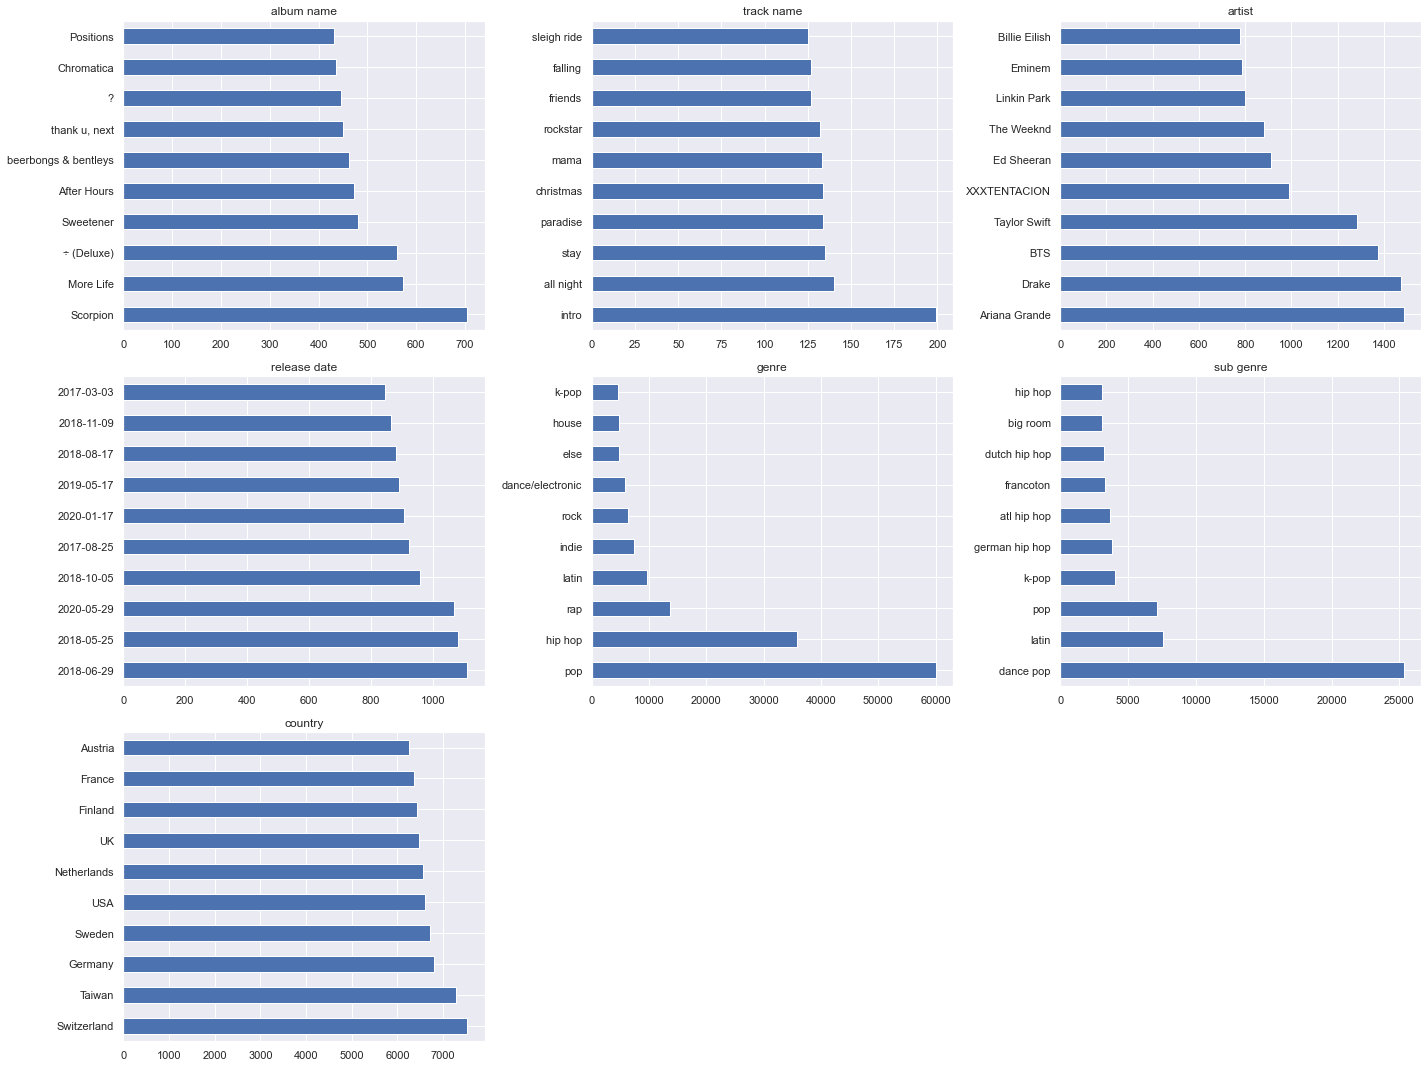

In [28]:
fig2 = plt.figure(figsize=(20,15))
ax1 = fig2.add_subplot(331)
ax1.set_title("album name")
df['album'].value_counts().head(10).plot(kind='barh')


ax1 = fig2.add_subplot(332)
ax1.set_title("track name")
df['title'].value_counts().head(10).plot(kind='barh')


ax1 = fig2.add_subplot(333)
ax1.set_title("artist")
df['artist'].value_counts().head(10).plot(kind='barh')


ax1 = fig2.add_subplot(334)
ax1.set_title("release date")
df['release_date'].value_counts().head(10).plot(kind='barh')


ax1 = fig2.add_subplot(335)
ax1.set_title("genre")
df['genre'].value_counts().head(10).plot(kind='barh')


ax1 = fig2.add_subplot(336)
ax1.set_title("sub genre")
df['sub_genre'].value_counts().head(10).plot(kind='barh')

ax1 = fig2.add_subplot(337)
ax1.set_title("country")
df['country'].value_counts().head(10).plot(kind='barh')

plt.tight_layout()

The sub genres have high difference in total amount of tracks for each subgerne.

### Lets take a look into the artist column

In [29]:
df['artist'].sample(30)

104531                                               Fard
49544                            J Balvin - Willy William
93537                                     Whitney Houston
11302                                           Rammstein
15936                                           Ali Gatie
61570     Diplo - French Montana - Lil Pump - Zhavia Ward
125342                                             Kraken
155526                                         White 2115
145630                                        Guè Pequeno
44967                       David Guetta - Martin Solveig
120022                                      Pabllo Vittar
117564                                           Bakermat
152204                                      Sondre Justad
91981                                    Dave - Burna Boy
23567                    Lunay - Daddy Yankee - Bad Bunny
53407                             Lil Wayne - Nicki Minaj
21197                                          Ed Sheeran
71557         

<AxesSubplot:ylabel='artist'>

<Figure size 1440x720 with 0 Axes>

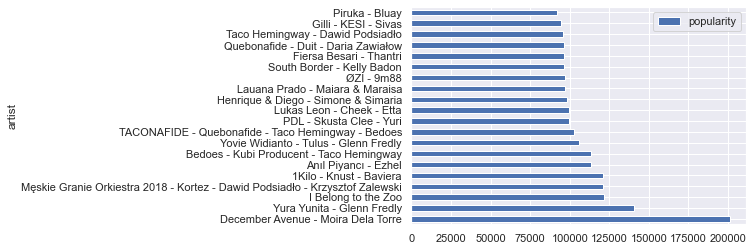

In [30]:
# Plot k most frequest artists over popularity
plt.figure(figsize=(20,10))
df_grouped = df[['popularity', 'artist']].groupby(['artist']).mean()
df_grouped.sort_values(by=['popularity'], ascending=False).head(20).plot.barh()


Visualize genre, subgenre, song characteristics trends over release year

Text(0.5, 0, 'Release Year')

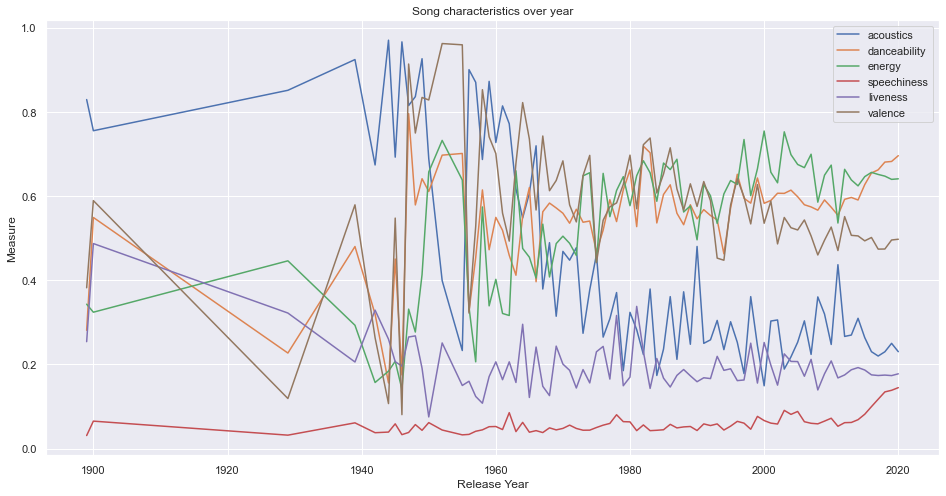

In [31]:
plt.figure(figsize=(16, 8))
columns = ["acoustics","danceability","energy","speechiness","liveness","valence"]
for col in columns:
    x = df.groupby("release_year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Song characteristics over year')
ax.set_ylabel('Measure')
ax.set_xlabel('Release Year')

# Artist Popularity
by sum of popularity of songs; the result is then mapped to [0,1].

<Figure size 1440x720 with 0 Axes>

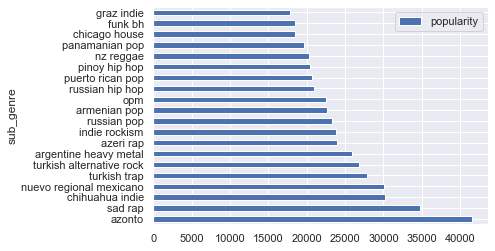

In [32]:
# Plot k most frequest sub_genres over popularity
plt.figure(figsize=(20,10))
df_grouped = df[['popularity', 'sub_genre']].groupby(['sub_genre']).mean()
df_grouped.sort_values(by=['popularity'], ascending=False).head(20).plot.barh()
plt.show()

Text(0, 0.5, 'Genre')

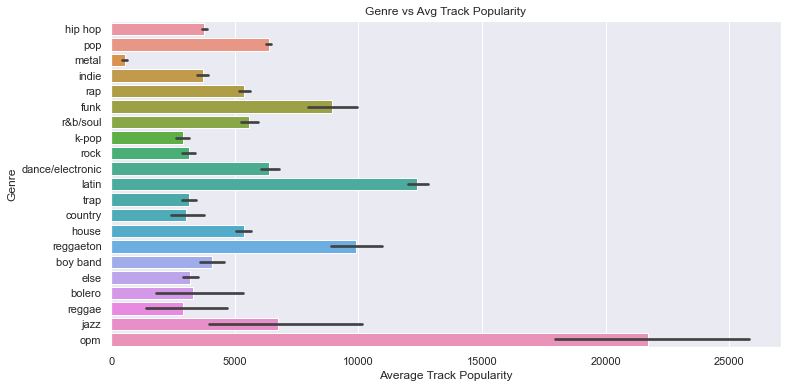

In [33]:
plt.figure(figsize=(12, 6))
bp = sns.barplot(data=df, x="popularity", y="genre", estimator=np.mean)
bp.set(title='Genre vs Avg Track Popularity')
bp.set_xlabel("Average Track Popularity", fontsize = 12)
bp.set_ylabel("Genre", fontsize = 12)

In [34]:
# I created a test df here to not mess with our tidy dataframe 
# by adding an artist_popularity column that we might not want there
test_df = df
test_df['popularity'] = (test_df['popularity']-test_df['popularity'].min())/(test_df['popularity'].max()-test_df['popularity'].min())
test_df['artist_popularity'] = test_df.groupby('artist')['popularity'].transform('sum')
test_df['artist_popularity'] = (test_df['artist_popularity']-test_df['artist_popularity'].min())/(test_df['artist_popularity'].max()-test_df['artist_popularity'].min())

In [35]:
test_df[['artist','artist_popularity']].sample(frac=1).head(10)

,artist,artist_popularity
84360,J. Cole,0.066451
44541,Selena Gomez - 6LACK,0.000158
157248,chillwagon,0.016209
111412,Felix Jaehn - VIZE - Miss Li,0.007360
45761,Ed Sheeran,1.000000
97323,j mena,0.003486
114072,MHD - WizKid,0.003232
121048,Pineapple StormTv - Choice - Azzy,0.000010
33304,James Bay,0.009512
141666,Niall Horan,0.086203


## Get Artist by (Calculated) Popularity

In [36]:
artist_popularity = test_df[['artist','artist_popularity']].drop_duplicates()
artist_popularity.sort_values('artist_popularity', ascending=False).head(10)

,artist,artist_popularity
6210,Ed Sheeran,1.000000
2690,Billie Eilish,0.521633
320,Dua Lipa,0.492004
117,Drake,0.491809
747,Ariana Grande,0.490292
1839,Post Malone,0.476521
658,XXXTENTACION,0.377199
8767,Lewis Capaldi,0.311130
1035,The Weeknd,0.310360
5867,Imagine Dragons,0.302311


What if we just count the appearances?

<AxesSubplot:title={'center':'Most Occurring Artist in Dataset'}, ylabel='Artist'>

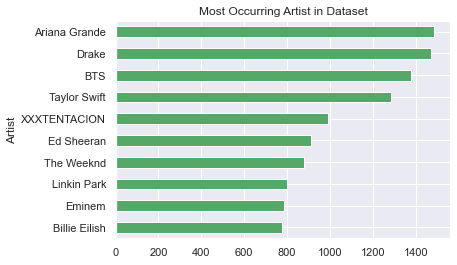

In [37]:
aux_df = df.groupby('artist').size().sort_values(ascending=False)[:10]
aux_df.sort_values().plot(kind='barh', color = 'g', title='Most Occurring Artist in Dataset', xlabel="Artist")

##  Artist Popularity per Country
### Germany

In [38]:
# Only German charts
germany = df[test_df['country']=='Germany']

# Calculate artist_popularity in Germany as before with all (sum over all song popularities and mapping btwn 0 and 1)
germany['artist_popularity'] = germany.groupby('artist')['popularity'].transform('sum')
germany['artist_popularity'] = (germany['artist_popularity']-germany['artist_popularity'].min())/(germany['artist_popularity'].max()-germany['artist_popularity'].min())

# Drop duplicates 
artist_popularity_germany = germany[['artist','artist_popularity']].drop_duplicates()

# List top 10 artists in Germany
artist_popularity_germany.sort_values('artist_popularity', ascending=False).head(10)

,artist,artist_popularity
1562,Apache 207,1.000000
23285,Capital Bra,0.663605
6223,Ed Sheeran,0.558611
3729,Luciano,0.475254
4287,Bonez MC - RAF Camora,0.469129
1119,Ufo361,0.426831
11097,RIN,0.420004
30249,RAF Camora,0.374885
56654,Bausa,0.372888
2758,Samra,0.355336


<AxesSubplot:title={'center':'Most Occurring Artists in German Charts'}, ylabel='Artist'>

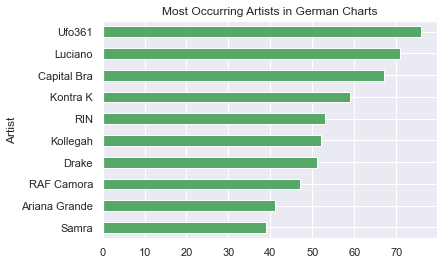

In [39]:
# Most occuring 
aux_df = germany.groupby('artist').size().sort_values(ascending=False)[:10]
aux_df.sort_values().plot(kind='barh', color = 'g',title='Most Occurring Artists in German Charts', xlabel="Artist")

### USA

In [40]:
usa = df[test_df['country']=='USA']
usa['artist_popularity'] = usa.groupby('artist')['popularity'].transform('sum')
usa['artist_popularity'] = (usa['artist_popularity']-usa['artist_popularity'].min())/(usa['artist_popularity'].max()-usa['artist_popularity'].min())

artist_popularity_usa = usa[['artist','artist_popularity']].drop_duplicates()
artist_popularity_usa.sort_values('artist_popularity', ascending=False).head(10)

,artist,artist_popularity
1840,Post Malone,1.000000
659,XXXTENTACION,0.874617
118,Drake,0.830358
1137,Travis Scott,0.735029
1248,Juice WRLD,0.694348
2139,Lil Uzi Vert,0.636172
6365,Billie Eilish,0.632523
748,Ariana Grande,0.546399
6082,Khalid,0.448957
15886,Kendrick Lamar,0.353948


<AxesSubplot:title={'center':'Most Occurring Artists in American Charts'}, ylabel='Artist'>

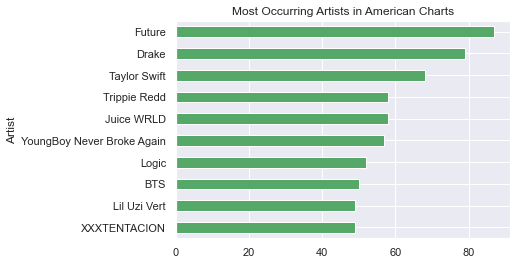

In [41]:
aux_df = usa.groupby('artist').size().sort_values(ascending=False)[:10]
aux_df.sort_values().plot(kind='barh', color = 'g',title='Most Occurring Artists in American Charts', xlabel="Artist")

### Global

In [42]:
global_ = test_df[test_df['country']=='Global']
global_['artist_popularity'] = global_.groupby('artist')['popularity'].transform('sum')
global_['artist_popularity'] = (global_['artist_popularity']-global_['artist_popularity'].min())/(global_['artist_popularity'].max()-global_['artist_popularity'].min())

artist_popularity_global = global_[['artist','artist_popularity']].drop_duplicates()
artist_popularity_global.sort_values('artist_popularity', ascending=False).head(10)

,artist,artist_popularity
6210,Ed Sheeran,1.000000
6364,Billie Eilish,0.763699
1839,Post Malone,0.762985
117,Drake,0.757352
747,Ariana Grande,0.718058
658,XXXTENTACION,0.708867
1136,Travis Scott,0.560846
320,Dua Lipa,0.513060
1035,The Weeknd,0.419197
1247,Juice WRLD,0.343683


<AxesSubplot:title={'center':'Most Occurring Artists in Global Charts'}, ylabel='Artist'>

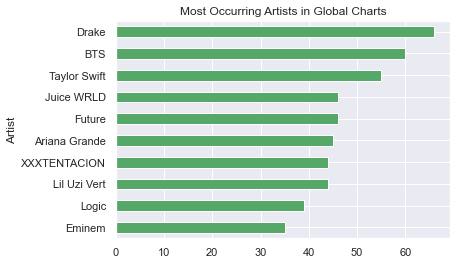

In [43]:
aux_df = global_.groupby('artist').size().sort_values(ascending=False)[:10]
aux_df.sort_values().plot(kind='barh', color = 'g',title='Most Occurring Artists in Global Charts', xlabel="Artist")

## Popularity by Artist Followers
Result: We don't get anything from this

WARNING: This might be useless code but I still wanted to include it

In [44]:
artist_followers = df[['artist','artist_followers']].drop_duplicates()

# artist_followers=artist_followers.replace('n-a','0')

# artist_followers = artist_followers.astype({'Artist_followers':'float'})

In [45]:
artist_followers.sort_values(by=['artist_followers'],ascending=False, inplace=True)

In [46]:
artist_followers.head(10)

,artist,artist_followers
92783,Ed Sheeran - Jaykae - Aitch - Stormzy,71783101.0
55774,Ed Sheeran - Camila Cabello - Cardi B,71783101.0
74266,Ed Sheeran - Travis Scott,71783101.0
18662,Ed Sheeran - Khalid,71783101.0
129250,Ed Sheeran - Tiësto,71783101.0
13357,Ed Sheeran - Yebba,71783101.0
70770,Ed Sheeran - H.E.R.,71783101.0
153186,Ed Sheeran - Seeb,71783101.0
153861,Ed Sheeran - Robin Schulz,71783101.0
66864,Ed Sheeran - Travis Scott - MK,71783101.0


## Genre per Year

In [47]:
genres = df['genre'].unique()
genres

array(['hip hop', 'pop', 'metal', 'indie', 'rap', 'funk', 'r&b/soul',
       'k-pop', 'rock', 'dance/electronic', 'latin', 'trap', 'country',
       'house', 'reggaeton', 'boy band', 'else', 'bolero', 'reggae',
       'jazz', 'opm'], dtype=object)

In [48]:
x = df[df['genre'] == 'pop']['release_year'].value_counts() # .plot(x= 'release_year')
x.sum()

60020

Text(0.5, 1.0, 'Amount of Songs Released Under a Genre')

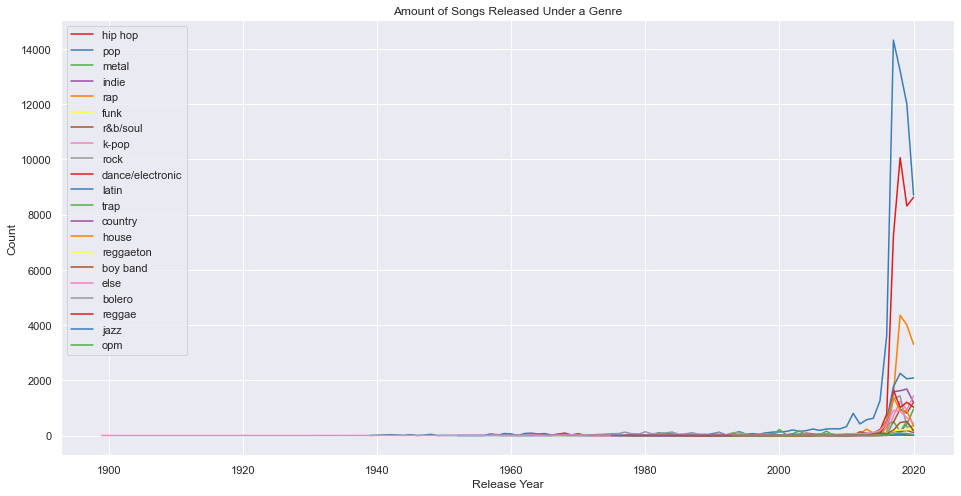

In [49]:
# All genres from 1940 to 2020; ignore
plt.figure(figsize=(16, 8))
sns.set_palette('Set1')
for genre in df['genre'].unique():
    y = df[df['genre'] == genre]['release_year'].value_counts()
    ax= sns.lineplot(data = y,label=genre)

ax.set_ylabel('Count')
ax.set_xlabel('Release Year')
ax.set_title('Amount of Songs Released Under a Genre')

Text(0.5, 1.0, 'Amount of Songs Released Under a Genre')

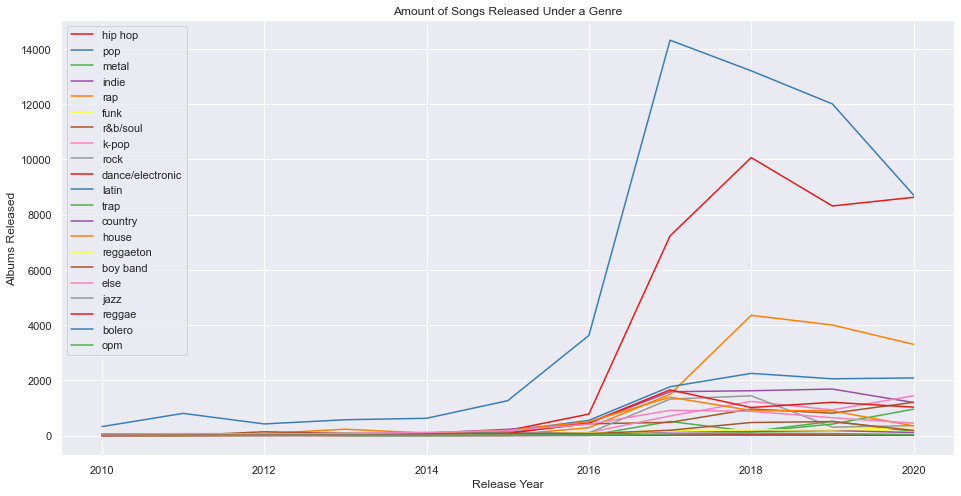

In [50]:
# All genres from 2010 to 2020; ignore
df_2017_2020 = df[df['release_year']>=2010]
plt.figure(figsize=(16, 8))
sns.set_palette("Set1")
for genre in df_2017_2020['genre'].unique():
    y = df_2017_2020[df_2017_2020['genre'] == genre]['release_year'].value_counts()
    ax= sns.lineplot(data = y,label=genre)
    
ax.set_ylabel('Albums Released')
ax.set_xlabel('Release Year')
ax.set_title('Amount of Songs Released Under a Genre')

Text(0.5, 1.0, 'Amount of Songs Released Under the Label of a Genre')

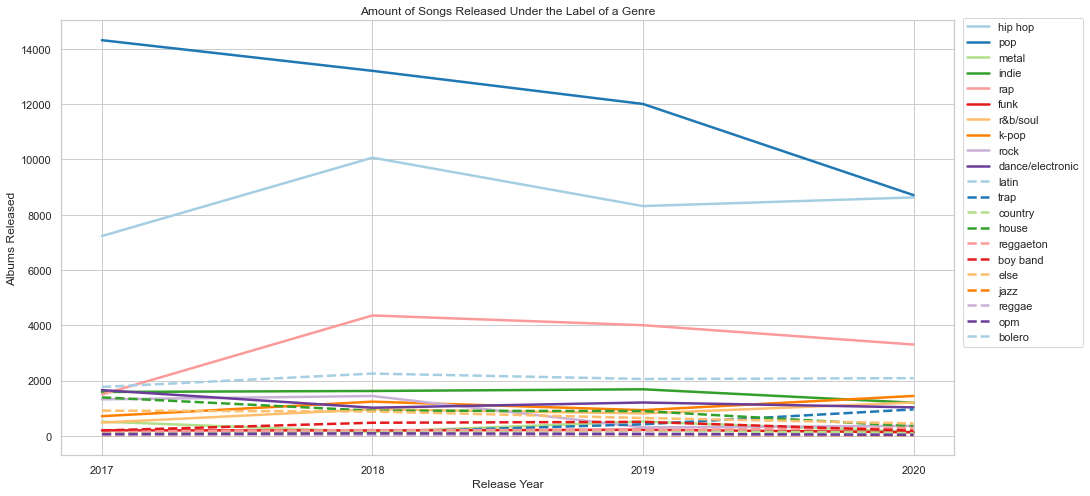

In [51]:
# All genres from 2017 to 2020; don't use
df_2017_2020 = df[df['release_year']>=2017]
plt.figure(figsize=(16, 8))
sns.set_palette("Paired", 10)
sns.set_style('whitegrid')
i=0
for genre in df_2017_2020['genre'].unique():
    i=i+1
    linestyle = '-'
    if i>10:
        linestyle='--'
    y = df_2017_2020[df_2017_2020['genre'] == genre]['release_year'].value_counts()
    ax= sns.lineplot(data = y,label=genre, lw=2.5, linestyle=linestyle)
    # ax.set_xticklabels(['','2017','','2018','','2019','','2020'])
    plt.xticks(np.arange(2017, 2021, 1.0))

ax.legend(loc=(1.01,0.25))
ax.set_ylabel('Albums Released')
ax.set_xlabel('Release Year')
ax.set_title('Amount of Songs Released Under the Label of a Genre')

Text(0.5, 1.0, 'Amount of Songs Released Under a Genre')

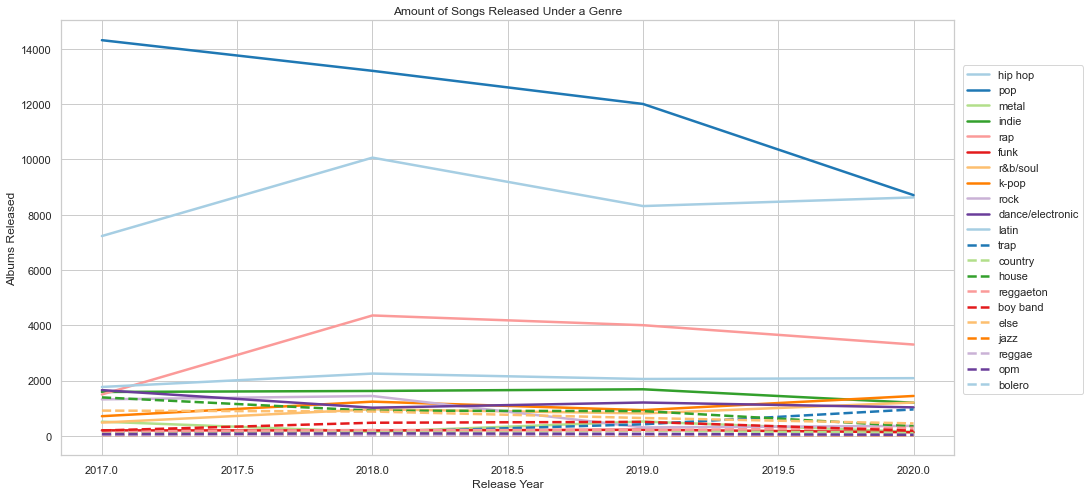

In [52]:
# All genres from 2015 to 2020
df_2015_2020 = df[df['release_year']>=2017]
plt.figure(figsize=(16, 8))
sns.set_palette("Paired", 10)
sns.set_style('whitegrid')
i=0
for genre in df_2015_2020['genre'].unique():
    i=i+1
    linestyle = '-'
    if i>11:
        linestyle='--'
    y = df_2015_2020[df_2015_2020['genre'] == genre]['release_year'].value_counts()
    ax= sns.lineplot(data = y,label=genre, linestyle = linestyle, lw=2.5)

ax.legend(loc=(1.01,0.14))
ax.set_ylabel('Albums Released')
ax.set_xlabel('Release Year')
ax.set_title('Amount of Songs Released Under a Genre')

In [53]:
# df.info()

In [54]:
x=0
for genre in df_2017_2020['genre'].unique():
    y = df_2017_2020[df_2017_2020['genre'] == genre]['release_year'].value_counts().sum()
    x = x+y
x

139363

Text(0.5, 1.0, 'Amount of Songs Released Under a Genre')

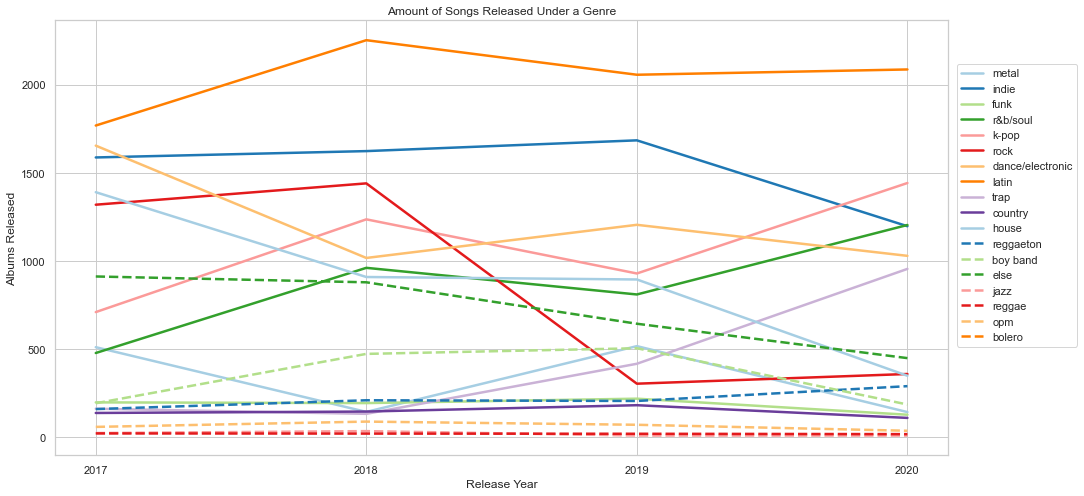

In [55]:
# Without the top 3 genres
# WARNING: not the same colors as above
df_2015_2020 = df[df['release_year']>=2017]
ax = plt.figure(figsize=(16, 8))
sns.set_palette("Paired",10)
sns.set_style('whitegrid')
i=0
for genre in df_2015_2020['genre'].unique():
    i=i+1
    linestyle = '-'
    if i>14:
        linestyle='--'
    if genre != 'pop' and genre != 'rap' and genre != 'hip hop':
        y = df_2015_2020[df_2015_2020['genre'] == genre]['release_year'].value_counts()
        ax= sns.lineplot(data = y,label=genre, linestyle = linestyle,lw=2.5)
        plt.xticks(np.arange(2017, 2021, 1.0))
        
ax.legend(loc=(1.01,0.25))
ax.set_ylabel('Albums Released')
ax.set_xlabel('Release Year')
ax.set_title('Amount of Songs Released Under a Genre')